# Problem Set 1 (120 points) 

## Important information
We provide signatures of the functions that you have to implement. Make sure you follow the signatures defined, otherwise your coding solutions will not be graded.

Read [homework rules](https://nbviewer.jupyter.org/github/oseledets/nla2018/blob/master/hw.pdf) carefully. <font color='red'>If you do not follow it you will likely be penalized.</font>

# Problem 1 (Python demo) 40 pts

## Data preparation (10 pts)

* First of all download $\verb|.wav|$ file with starcraft sound from [here](../files/TMaRdy00.wav). Load it in python and play using the following functions:

In [46]:
from scipy.linalg import toeplitz
import numpy as np
import math
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt
from IPython.display import Audio
%matplotlib notebook

<IPython.core.display.Javascript object>


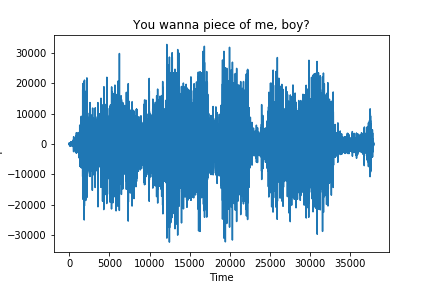

In [47]:
plt.figure()
# reading
rate, audio = wav.read("TMaRdy00.wav")

# plotting
plt.plot(audio)
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.title("You wanna piece of me, boy?")
plt.show()

# playing
Audio(audio, rate=rate)

Our next goal is to process this signal by multiplying it by a special type of matrix (convolution operation) that will smooth the signal. 

* (5 pts) Before processing this file let us estimate what size of matrix we can afford. Let $N$ be the size of the signal. Estimate analytically memory in megabytes required to store dense square matrix of size $N\times N$ to fit in your operation memory and print this number. Cut the signal so that you will not have swap (overflow of the operation memory). **Note:** Cut the signal by taking every p-th number in array: ```signal[::p]```. 

In [48]:
audio

array([   0,    0,    4, ...,   -7,  -92, -146], dtype=int16)

In [49]:
# We can see that our audio file has dtype int16
# then
N = 37888*37888 * 16 / 8 / 1024 / 1024 # bits / bytes / kbytes / mbytes
print(N) # 2738
# let's take every 2nd point
N = (37888 / 2) * (37888 / 2) * 16 / 8 / 1024 / 1024
print(N) # now it's fine

# but actually after transformations, numpy will use float64, so let's recalculate it for this type
N = (37888 / 2) * (37888 / 2) * 64 / 8 / 1024 / 1024
print(N) # again 2738, ok

2738.0
684.5
2738.0


* (5 pts) Write a function 
```python
def gen_toeplitz(N, alpha):    
    return T
```
that outputs matrix $T$: $$T_{ij} = \sqrt{\frac{\alpha}{\pi}}e^{-\alpha (i-j)^2}, \quad i,j=1,\dots,N$$ as numpy array. <font color='red'> Avoid using loops or lists! </font> The function [np.meshgrid](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.meshgrid.html) will be helpful for this task.
**Note:** matrices that depend only on difference of indices: $T_{ij} \equiv T_{i-j}$ are called **Toeplitz**. Toeplitz matrix-by-vector multiplication is **convolution** since it can be written as $$y_i = \sum_{j=1}^N T_{i-j} x_j.$$ Convolutions can be computed faster than $\mathcal{O}(N^2)$ complexity using Fast Fourier transform (will be covered later in our course, no need to implement it here).

In [50]:
# INPUT: N - integer (positive), alpha - float (positive)
# OUTPUT: T - np.array (shape: NxN)
from numba import jit

def gen_toeplitz(N, alpha):
    x = np.array([i for i in range(N)])
    i, j = np.meshgrid(x, x)
    return np.sqrt(alpha/np.pi)*np.exp(-alpha*(i-j)**2)

## Convolution (10 pts)

* (5 pts) Write a function ```convolution``` (see below)
that takes the signal you want to convolve and multiply it by Toeplitz matrix T (for matvec operations use @ symbol). 

In [51]:
# INPUT: signal - np.array (shape: Nx1), N - int (positive), alpha - float (positive)
# OUTPUT: convolved_signal - np.array (shape: Nx1)

def convolution(signal, N, alpha):
    return gen_toeplitz(N, alpha).dot(signal)

* (3 pts) Plot the first $100$ points of the result and the first $100$ points of your signal on the same figure. Do the same plots for $\alpha = \frac{1}{5}$, $\alpha = \frac{1}{100}$ using ```plt.subplots``` in matplotlib. Each subplot should contain first $100$ points of initial and convolved signals for some $\alpha$. Make sure that you got results that look like smoothed initial signal.

* (2 pts) Play the resulting signal. In order to do so you should also scale the frequency (rate), which is one of the inputs in `Audio`.  
Note that you cannot play a signal which is too small.

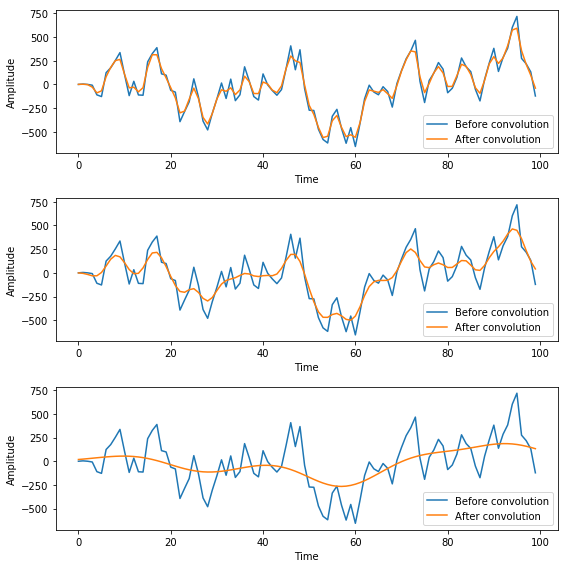

In [7]:
signal = audio[::2]
# Your code is here
plt.figure(figsize=(8,8))
plt.subplot(3,1,1)
plt.plot(signal[:100])
plt.plot(convolution(signal[:100], signal[:100].shape[0], 1))
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.legend(['Before convolution', 'After convolution'])
plt.subplot(3,1,2)
plt.plot(signal[:100])
plt.plot(convolution(signal[:100], signal[:100].shape[0], 1/5))
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.legend(['Before convolution', 'After convolution'])
plt.subplot(3,1,3)
plt.plot(signal[:100])
plt.plot(convolution(signal[:100], signal[:100].shape[0], 1/100))
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.legend(['Before convolution', 'After convolution'])
plt.tight_layout()
plt.show()

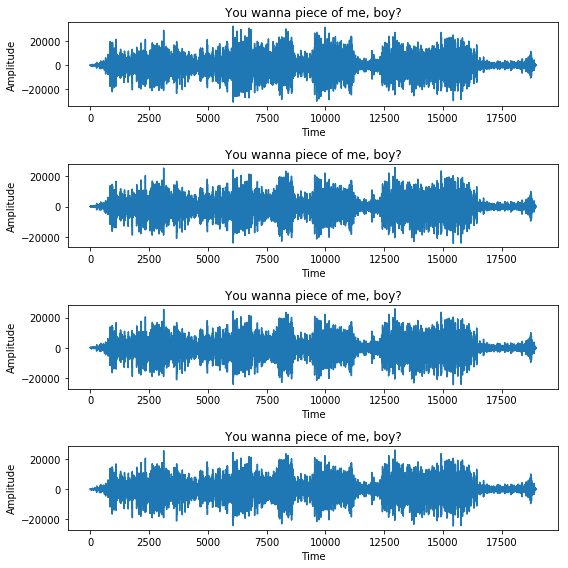

In [8]:
plt.figure(figsize=(8,8))
# reading
rate, audio = wav.read("TMaRdy00.wav")

plt.subplot(4,1,1)
# plotting
plt.plot(signal)
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.title("You wanna piece of me, boy?")

plt.subplot(4,1,2)
# plotting
plt.plot(convolution(signal, signal.shape[0], 1))
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.title("You wanna piece of me, boy?")

plt.subplot(4,1,3)
# plotting
plt.plot(convolution(signal, signal.shape[0], 1))
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.title("You wanna piece of me, boy?")
# playing
Audio(convolution(signal, signal.shape[0], 1/5), rate=rate/2)

plt.subplot(4,1,4)
# plotting
plt.plot(convolution(signal, signal.shape[0], 1))
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.title("You wanna piece of me, boy?")
# playing
Audio(convolution(signal, signal.shape[0], 1/100), rate=rate/2)

plt.tight_layout()
plt.show()

In [9]:
Audio(signal, rate=rate/2)

In [10]:
Audio(convolution(signal, signal.shape[0], 1), rate=rate/2)

In [11]:
Audio(convolution(signal, signal.shape[0], 1/5), rate=rate/2)

In [12]:
Audio(convolution(signal, signal.shape[0], 1/100), rate=rate/2)

## Deconvolution (20 pts)

Given a convolved signal $y$ and an initial signal $x$ our goal now is to recover $x$ by solving the system
$$
    y = Tx.
$$
To do so we will run iterative process
$$
    x_{k+1} = x_{k} - \tau_k (Tx_k - y), \quad k=1,2,\dots
$$
starting from zero vector $x_0$. There are different ways how to define parameters $\tau_k$.
Different choices lead to different methods (e.g. Richardson iteration, Chebyshev iteration, etc.).
This topic will be covered in details later in our course.

To get some intuition why this process converges to the solution of $Tx=y$, we can consider the following. Let us note that if $x_k$ converges to some limit $x$, then so does $x_{k+1}$. Taking $k\to \infty$ we arrive at $x = x - \tau (Tx -  y)$ and hence $x$ is the solution of $Tx = y$. 

Another important point is that iterative process requires only matrix-vector porducts $Tx_k$ on each iteration instead of the whole matrix. In this problem we, however, work with the full matrix, but keep in mind, that convolution can be done efficiently without storing the whole matrix.

* (5 pts) For each $k$ choose paremeter $\tau_k$ such that the residual $r_{k+1}=Tx_{k+1} - y$ is minimal possible (*line search* with search direction $r_k$):
$$
    \|Tx_{k+1} - y\|_2 \to \min_{\tau_k}
$$
found analytically. The answer to this bullet is a derivation of $\tau_k$. The parameter $\tau_k$ should be expressed in terms of residuals $r_k = T x_k - y$.

$$
    \|Tx_{k+1} - y\|_2 \to \min_{\tau_k}
$$
$$
    \|T(x_k-\tau_k(Tx_k-y)) - y\|_2 \to \min_{\tau_k}
$$
$$
    \sqrt{\langle T(x_k-\tau_k(Tx_k-y)) - y, T(x_k-\tau_k(Tx_k-y)) - y \rangle} \to \min_{\tau_k}
$$
Let's denote $Tx_k-y \equiv r_k$


And then differentiate by $\tau_k$ and find extremum, setting derivative to zero.
$$
\frac{d}{d\tau_k} (\langle T(x_k-\tau_k r_k), T(x_k-\tau_k r_k) \rangle + \langle y,y \rangle -2 \langle y, T(x_k-\tau_k r_k) \rangle) = 0
$$

$$
    \frac{d}{d\tau_k} (\langle Tx_k,Tx_k\rangle + \tau_k^2 \langle(Tr_k,Tr_k) - 2\tau_k \langle Tx_k,Tr_k \rangle ) - 2(y, -Tr_k) = 0
$$

$$
    2\tau_k \langle Tr_k,Tr_k \rangle-2 \langle Tx_k,Tr_k \rangle +2 \langle y,Tr_k \rangle=0
$$

$$
    2\tau_k \langle Tr_k,Tr_k \rangle + 2 \langle y-Tx_k,Tr_k \rangle=0
$$

$$
    \tau_k = \frac{\langle r_k, Tr_k \rangle}{\langle Tr_k, Tr_k \rangle}
$$

In [17]:
np.linalg.norm(signal)

862394.6656925703

* (10 pts) Write a function ```iterative```
that outputs accuracy –– a numpy array of relative errors $\big\{\frac{\|x_{k+1} - x\|_2}{\|x\|_2}\big\}$ after ```num_iter``` iterations using $\tau_k$ from the previous task. **Note:** The only loop you are allowed to use here is a loop for $k$.

In [53]:
# INPUT:  N - int (positive), alpha - float (positive), num_iter - integer (positive), 
#  y - np.array (shape: Nx1, convolved signal), s - np.array (shape: Nx1, original signal)
# OUTPUT: rel_error - np.array size (num_iter x 1)


def iterative(N, num_iter, y, s, alpha):
    rel_error = []
    current = np.zeros(N)
    T = gen_toeplitz(N, alpha)
    for k in range(num_iter):
        residual = T.dot(current) - y
        convolved = T.dot(residual)
        tau = np.dot(residual, convolved)/np.dot(convolved, convolved)
        current = current - tau*residual
        re = np.linalg.norm(current - s)/np.linalg.norm(s)
        rel_error.append(re)
    return rel_error

* (2 pts) Set ```num_iter=1000```, ```x=s[::20]``` and do a convergence plot for $\alpha = \frac{1}{2}$ and $\alpha = \frac{1}{5}$.

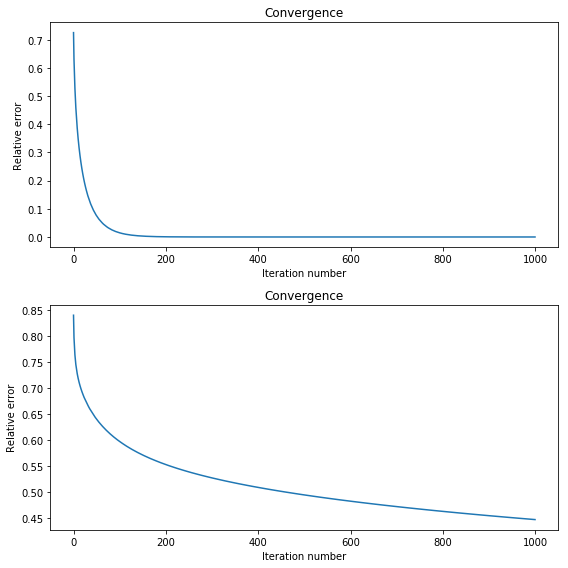

In [20]:
# Your plots are here  
plt.figure(figsize=(8,8))
w = signal[::20]
num_iter = 1000

alpha = 1/2
errors = iterative(w.shape[0], num_iter, convolution(w, w.shape[0], alpha), w, alpha)

plt.subplot(2,1,1)
plt.plot(errors)
plt.ylabel("Relative error")
plt.xlabel("Iteration number")
plt.title("Convergence")

alpha = 1/5
errors = iterative(w.shape[0], num_iter, convolution(w, w.shape[0], alpha), w, alpha)

plt.subplot(2,1,2)
plt.plot(errors)
plt.ylabel("Relative error")
plt.xlabel("Iteration number")
plt.title("Convergence")

plt.tight_layout()
plt.show()

* (3 pts) Set ```x=s[::20]```, ```num_iter=1000``` and $\alpha=\frac{1}{5}$. Explain what happens with the convergence if you add small random noise of amplitude $10^{-3}\max(x)$  to $y$. The answer to this question should be an explanation supported by plots and/or tables.

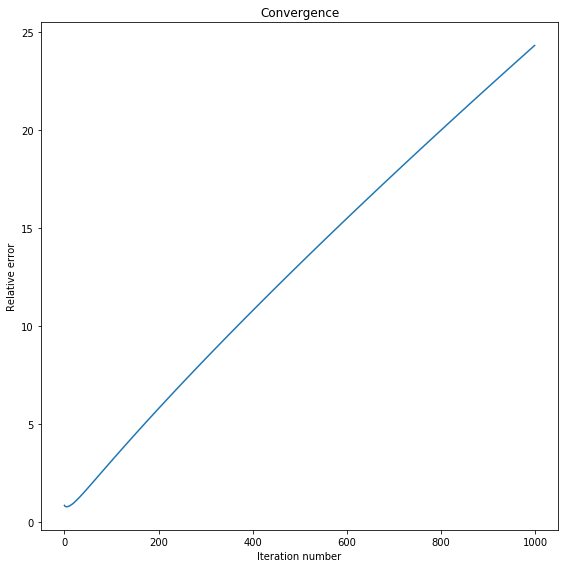

In [28]:
# Your code is here
import random
plt.figure(figsize=(8,8))
w = signal[::20]
noise = np.array([random.uniform(-10e-3*np.max(w), 10e-3*np.max(w)) for i in range(len(w))])
num_iter = 1000

alpha = 1/5
errors = iterative(w.shape[0], num_iter, convolution(w, w.shape[0], alpha) + noise, w, alpha)

plt.plot(errors)
plt.ylabel("Relative error")
plt.xlabel("Iteration number")
plt.title("Convergence")

plt.tight_layout()
plt.show()

We can see that at this moment our iterative process doesn't converge.

Let's consider this formula
$$x_{k+1} = x_k - \tau_k (Tx_k-y_{noised})$$
It can be rewritten as
$$x_{k+1} = x_k - \tau_k (Tx_k-y - n)$$
$$x_{k+1} = x_k - \tau_k (Tx_k-y) + \tau_k n$$

I think that it's just converges to another point. So we are solving another task. Let's try to find closer x value

In [68]:
def iterative_return_x(N, num_iter, y, s, alpha):
    rel_error = []
    current = np.zeros(N)
    T = gen_toeplitz(N, alpha)
    for k in range(num_iter):
        residual = T.dot(current) - y
        convolved = T.dot(residual)
        tau = np.dot(residual, convolved)/np.dot(convolved, convolved)
        current = current - tau*residual
        re = np.linalg.norm(current - s)/np.linalg.norm(s)
        rel_error.append(re)
    return current

In [95]:
new_x = iterative_return_x(w.shape[0], 1000, convolution(w, w.shape[0], alpha) + noise, w, alpha)

<IPython.core.display.Javascript object>


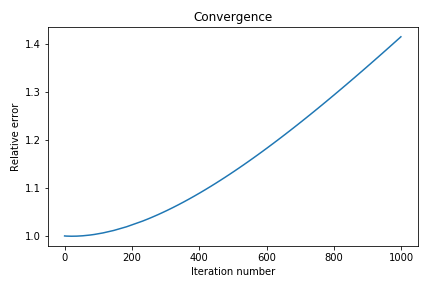

In [96]:
plt.figure()
w = signal[::20]
noise = np.array([random.uniform(-10e-3*np.max(w), 10e-3*np.max(w)) for i in range(len(w))])
num_iter = 1000

alpha = 1/5
errors = iterative(w.shape[0], num_iter, convolution(w, w.shape[0], alpha) + noise, new_x, alpha)

plt.plot(errors)
plt.ylabel("Relative error")
plt.xlabel("Iteration number")
plt.title("Convergence")

plt.tight_layout()
plt.show()

So, the process still doesn't converge, but we can see that new_x value helped to decrease relative error.

# Problem 2 (Theoretical tasks)  45 pts

_1._
- (5 pts) Prove that $\| U A \|_F = \| A U \|_F = \| A \|_F$ for any unitary matrix $U$.
- (5 pts) Prove that $\| Ux \|_2 = \| x \|_2$ for any $x$ iff $U$ is unitary.
- (5 pts) Prove that $\| U A \|_2 = \| A U \|_2 = \| A \|_2$ for any unitary $U$.
  
_2._
- (5 pts) Using the results from the previous subproblem, prove that $\| A \|_F \le \sqrt{\mathrm{rank}(A)} \| A \|_2$. _Hint:_ SVD will help you.
- (5 pts) Show that for any $m, n$ and $k \le \min(m, n)$ there exists $A \in \mathbb{R}^{m \times n}: \mathrm{rank}(A) = k$, such that $\| A \|_F = \sqrt{\mathrm{rank}(A)} \| A \|_2$. In other words, show that the previous inequality is strict.
- (5 pts) Prove that if $\mathrm{rank}(A) = 1$, then $\| A \|_F  = \| A \|_2$.
- (5 pts) Prove that $\| A B \|_F \le \| A \|_2 \| B \|_F$.

_3._    
* (3 pts) Differentiate with respect to $A$ the function
$$
f(A) = \mathrm{sin}(x^\top A B C D x),
$$
where $x$ is a vector and $A, B, C, D$ are square matrices.

* (7 pts) Differentiate with respect to $y, A, X$ the function
$$f(y, A, X) = \mathrm{tr}(\mathrm{diag}(y) A X),$$
where $y \in \mathbb{R}^n$ and $A, X \in \mathbb{R}^{n \times n}$. Here 

$$
\mathrm{diag}(y)_{i, j} = 
    \begin{cases}
      y_i, & \text{if}\ i = j \\
      0, & \text{otherwise}
    \end{cases}
$$

$\textit{1.1}$

From lections we know: 
$$
\|A\|_F = \sqrt{tr(A^*A)}
$$
Then
$$
\|UA\|_F = \sqrt{tr(A^*U^*UA)} = \sqrt{tr(A^*A)} = \|A\|_F
$$

$$
\|AU\|_F = \sqrt{tr(U^*A^*AU)} \stackrel{\text{tr(BC)=tr(CB)}}{=} \sqrt{tr(AUU^*A^*)} = \sqrt{tr(AA^*} \stackrel{\text{tr(BC)=tr(CB)}}{=} \sqrt{tr(A^*A)} = \|A\|_F
$$

$\textit{1.2}$

$$
    \Rightarrow
$$

$$
    \| Ux \|_2=\| x \|_2
$$

$$
    \sqrt{\langle Ux, Ux \rangle} = \sqrt{\langle x,x \rangle}
$$

$$
    \sqrt{\langle Ux, Ux \rangle} = \sqrt{\langle x, U^*Ux \rangle} \Rightarrow U^*Ux = x \Rightarrow U^*U=I_n
$$
Since $U \in C^{n,n}$, $\Rightarrow U^*=U^{-1}$ and $UU^*=I_n \Rightarrow$ $U$ is unitary

$$
    \Leftarrow
$$

$$
    UU^*=U^*U=I_n
$$

$$
    U^*Ux=I_n x = x
$$

$$
    \langle y, U^*Ux \rangle = \langle Uy, Ux \rangle = \langle y,x \rangle \Rightarrow \|Ux\|_2 = \|x\|_2
$$

$\textit{1.3}$

$$
    \|UA\|_2 = \sqrt{\lambda_{max}(A^*U^*UA)} = \sqrt{\lambda_{max}(A^*A)} = \|A\|_2
$$

2-norm is sub-multiplicative https://en.wikipedia.org/wiki/Matrix_norm#Matrix_norms_induced_by_vector_norms , so
$$
    \|AU\|_2 \leq \|A\|_2 \|U\|_2
$$

$$
    \|UA\|_2=\sup_{\|x\|_2 \neq 0} \frac{\|UAx\|_2}{\|x\|_2}
$$

$$
    \|A\|_2=\sup_{\|x\|_2 \neq 0} \frac{\|Ax\|_2}{\|x\|_2}
$$

For non-zero vector $x$ and unitary matrix $U$, let's consider vector $Ux$
$$
    \|A\|_2 \leq \frac{\|AUx\|_2}{\|Ux\|_2} \stackrel{\text{U-preserves 2-norm}}{=} \frac{\|AUx\|}{\|x\|_2} \leq \sup_{\|x\|_2 \neq 0} \frac{\|AUx\|_2}{\|x\|_2} = \|AU\|_2
$$

Thus, we limited $\|AU\|_2$ from both sides and
$$
    \Rightarrow \|AU\|_2 = \|A\| = \|UA\|_2
$$

$\textit{2.1}$

Using theorem about SVD
$$
    A = U \Sigma V^*, A \in C^{m,n}, U \in C^{n,k}, V \in C^{m,k}, \Sigma \equiv diag(\sigma_1 \geq \dotso \geq \sigma_k), rank(A)=r, \sigma_{r+1}= \dotso = \sigma_k = 0, k=min(m,n)
$$

$$
    \|A\|_F = \|U\Sigma V^*\|_{F}
$$
Let $k=m$, so $m<n$, then $U*U=I_n$  (left unitary), and $V$ is unitary
$$
    \|A\|_F = \sqrt{tr(A^*A)} = \sqrt{tr(V\Sigma^*U^*U\Sigma V^*)} = \sqrt{tr(V\Sigma^*\Sigma V^*)} \stackrel{\text{tr(BC)=tr(CB)}}{=} \sqrt{tr(\Sigma V^* V \Sigma^*)} = \sqrt{tr(\Sigma \Sigma^*)} \stackrel{\text{taking max singular value}}{\leq} \sqrt{r \cdot \sigma_1^2} = \sqrt{r} \|A\|_2
$$

$\textit{2.2}$

We'll get what we want if $A$ has equal singular numbers as $\|A\|_F$=$\sqrt{tr(\Sigma \Sigma^*)}$

The first example are matrices with k ones on the main diagonal and with zeros on other places.
$$
$$

$\textit{2.3}$

Let's return back to 2.1. We know that
$$
    \|A\|_F = \sqrt{tr(\Sigma \Sigma^*)} = \sqrt{\sigma_1^2} = \sigma_1 = \|A\|_2 
$$

$\textit{2.4}$

Let's use singular decomposition for A and B, then
$$
    \|AB\|_F=\sqrt{tr(B^*A^*AB)} = \sqrt{tr(\Sigma_{a}^{*}\Sigma_{a}^{*}\Sigma_{b}^{*}\Sigma_{b})}
$$

We also know that
$$
    \|A\|_2 = \sigma_{a}^{max} = \sqrt{\lambda_{max} \Sigma_{a}^{*} \Sigma_a}
$$
and
$$
    \|B\|_F = \sqrt{tr(\Sigma_b^*\Sigma_b)}
$$
Then, the desired statement is equivalent to
$$
    tr(\Sigma_a^*\Sigma_a\Sigma_b^*\Sigma_b) \leq \lambda_{max}(\Sigma_a^*\Sigma_a)\cdot tr(\Sigma_b^* \Sigma_b)
$$
Thus we come to
$$
    \sum_{i=1}^{min(rank(\Sigma_a),rank(\Sigma_b))} (\sigma_{a}^{i})^2 (\sigma_{b}^{i})^2 \vee \sum_{j=1}^{rank(\Sigma_b)}(\sigma_a^{max})^2 (\sigma_b^j)^2
$$
So the number of components in the left sumation **is lower or equal** to the number of components in the right summation. Also in the right summation we can see the maximum singular value of the matrix A. So $\vee$ transforms to $\leq$ and we have
$$
    \sum_{i=1}^{min(rank(\Sigma_a),rank(\Sigma_b))} (\sigma_{a}^{i})^2 (\sigma_{b}^{i})^2 \leq \sum_{j=1}^{rank(\Sigma_b)}(\sigma_a^{max})^2 (\sigma_b^j)^2 \Rightarrow \|AB\|_F \leq \|A\|_2\|B\|_F
$$

$\textit{3.1}$

Let's first denote $BCDx \equiv l$.

$$
    f(A) = sin(x^T A l)
$$

$$
    \frac{d f(A)}{dA} = cos(x^T A l) \cdot \frac{dx^TAl}{dA} = cos(x^T A l) \cdot x^T l = cos(x^T A l)xx^T D^T C^T B^T
$$

$\textit{3.2}$

$$
    tr(diag(y)AX)=tr(diag(y)K)=\sum_{j=1}^{n} y_j \sum_{i=1}^{n} a_{ji} x_{ij}
$$
By $y$

$$
    \frac{df(y,A,X)}{dy} = (\sum_{i}^{n} a_{1i} x_{i1}, \dotso, \sum_{i}^{n} a_{ni} x_{in})
$$

By $A$

$$
 tr(AXB) = \langle A^T, XB \rangle = \frac{d}{dX} \langle A^T, XB \rangle = \langle A^T, dXB \rangle = \langle A^TB^T, dX \rangle \Rightarrow \frac{d}{dX} tr(AXB) = A^TB^T
$$

So, in our case we have
$$
    \frac{d}{dA} tr(diag(y)AX) = diag(y)^TX^T=diag(y)X^T
$$

By $X$

Again, using materials from the lecture. ($\frac{d}{dX} tr(AX) = A^T$)
$$
    \frac{d}{dX} tr(diag(y)AX) = (diag(y)A)^T = A^Tdiag(y)^T = A^T diag(y)
$$

Also, am I right, that derivative of f wrt A is, by definition, a matrix (with elements $\frac{\partial f}{\partial a_{ij}}$)?

# Problem 3 (Strassen algorithm) 15 pts

_1._ (3 pts) Implement the naive algorithm for squared matrix multiplication with explicit “for” cycles.

In [16]:
from numba import jit

@jit(nopython=True, parallel=True)
def naive_multiplication(A:np.ndarray, B:np.ndarray)->np.ndarray:
    """
    Implement naive matrix multiplication with explicit for cycles
    
    Parameters: Matrices A, B
    
    Returns: Matrix C = AB
    """
#     Your code is here 
    assert A.shape[0] == A.shape[1], "Only square matrices"
    assert B.shape[0] == B.shape[1], "Only square matrices"
    n = A.shape[0]
    C = np.zeros(A.shape) # valid for square matrices multiplication
    for i in range(n):
        for j in range(n):
            for k in range(n):
                C[i][j] += A[i][k] * B[k][j]
    return C

In [17]:
@jit(nopython=True, parallel=True)
def my_naive_multiplication(A:np.ndarray, B:np.ndarray)->np.ndarray:
    """
    with small optimization
    """
#     Your code is here 
    assert A.shape[0] == A.shape[1], "Only square matrices"
    assert B.shape[0] == B.shape[1], "Only square matrices"
    n = A.shape[0]
    C = np.zeros(A.shape) # valid for square matrices multiplication
    for i in range(n):
        for k in range(n):
            for j in range(n):
                C[i][j] += A[i][k] * B[k][j]
    return C

_2._ (7 pts) Implement the Strassen algorithm.

In [11]:
from numba import jit

@jit(nopython=True, parallel=True)
def make_matrice_even_again(A): # !!!
    A_transformed = np.zeros((A.shape[0]+1, A.shape[1]+1))
    for idx in range(A.shape[0]):
        row = A[idx]
        for j in range(len(row)):
            A_transformed[idx][j] = row[j]
    return A_transformed


@jit(parallel=True)
def strassen(A:np.ndarray, B:np.ndarray) -> np.ndarray:
    """
    Implement Strassen algorithm for matrix multiplication 
    
    Parameters: Matrices A, B
    
    Returns: Matrix C = AB
    """
    #Your code is here
    assert A.shape[0] == A.shape[1], "Only square matrices"
    assert B.shape[0] == B.shape[1], "Only square matrices"
    initial_shape = A.shape 
    if A.shape[0] == 2:
        return naive_multiplication(A,B)
    
    A_transformed = A
    if A.shape[0] % 2 != 0:
        A_transformed = make_matrice_even_again(A)
        
    B_transformed = B
    if B.shape[0] % 2 != 0:
        B_transformed = make_matrice_even_again(B)
        
    A_transformed = np.matrix(A_transformed)
    B_transformed = np.matrix(B_transformed)
    sh = A_transformed.shape    
    
    A11 = A_transformed[:int(sh[0]/2),:int(sh[0]/2)]
    A12 = A_transformed[:int(sh[0]/2),int(sh[0]/2):]
    A21 = A_transformed[int(sh[0]/2):,:int(sh[0]/2)]
    A22 = A_transformed[int(sh[0]/2):,int(sh[0]/2):]
    
    B11 = B_transformed[:int(sh[0]/2),:int(sh[0]/2)]
    B12 = B_transformed[:int(sh[0]/2),int(sh[0]/2):]
    B21 = B_transformed[int(sh[0]/2):,:int(sh[0]/2)]
    B22 = B_transformed[int(sh[0]/2):,int(sh[0]/2):]
    
    P1 = strassen(A11+A22, B11+B22)
    P2 = strassen(A21+A22, B11)
    P3 = strassen(A11, B12-B22)
    P4 = strassen(A22, B21-B11)
    P5 = strassen(A11+A12, B22)
    P6 = strassen(A21-A11, B11+B12)
    P7 = strassen(A12-A22, B21+B22)
    
    C11 = P1 + P4 - P5 + P7
    C12 = P3 + P5
    C21 = P2 + P4
    C22 = P1 - P2 + P3 + P6
    
    C1 = np.concatenate((C11, C12), axis=1)
    C2 = np.concatenate((C21, C22), axis=1)
    
    C = np.concatenate((C1, C2), axis=0)
    C = C[:initial_shape[0], :initial_shape[1]]
    
    return C

_3._ (5 pts) Compare three approaches: naive multiplication, Strassen algorithm and standard NumPy function. 
Provide a plot in log-scale of dependence between the matrix size and the runtime of multiplication. You will have three lines, do not forget to add legend, axis labels and other attributes (see our [requirements](https://nbviewer.jupyter.org/github/oseledets/nla2018/blob/master/hw.pdf))  
Consider the matrix size in the range of 100 to 700 with step 100, e.g. $n=100, 200,\ldots, 700$. 
Justify the results theoretically (e.g., use the known formulas for total multiplication complexity of naive and Strassen algorithms).

In [18]:
%%time
import time
ns = np.arange(100,800,100)
naive_times = []

for n in ns:
    print(n)
    ma = np.random.rand(n,n)
    mb = np.random.rand(n,n)
    start = time.time()
    naive_multiplication(ma,mb)
    end = time.time()
    naive_times.append(end-start)

100
200
300
400
500
600
700
CPU times: user 3.42 s, sys: 0 ns, total: 3.42 s
Wall time: 3.41 s


In [19]:
%%time
import time
ns = np.arange(100,800,100)
my_naive_times = []

for n in ns:
    print(n)
    ma = np.random.rand(n,n)
    mb = np.random.rand(n,n)
    start = time.time()
    my_naive_multiplication(ma,mb)
    end = time.time()
    my_naive_times.append(end-start)

100
200
300
400
500
600
700
CPU times: user 1.48 s, sys: 0 ns, total: 1.48 s
Wall time: 1.47 s


In [13]:
%%time
strassen_times = []

for n in ns:
    print(n)
    ma = np.random.rand(n,n)
    mb = np.random.rand(n,n)
    start = time.time()
    strassen(ma,mb)
    end = time.time()
    strassen_times.append(end-start)

100
200
300
400
500
600
700
CPU times: user 1h 33min 39s, sys: 56min 43s, total: 2h 30min 22s
Wall time: 1h 40min 6s


In [14]:
%%time
dot_times = []

for n in ns:
    print(n)
    ma = np.random.rand(n,n)
    mb = np.random.rand(n,n)
    start = time.time()
    np.dot(ma,mb)
    end = time.time()
    dot_times.append(end-start)

100
200
300
400
500
600
700
CPU times: user 236 ms, sys: 180 ms, total: 416 ms
Wall time: 149 ms


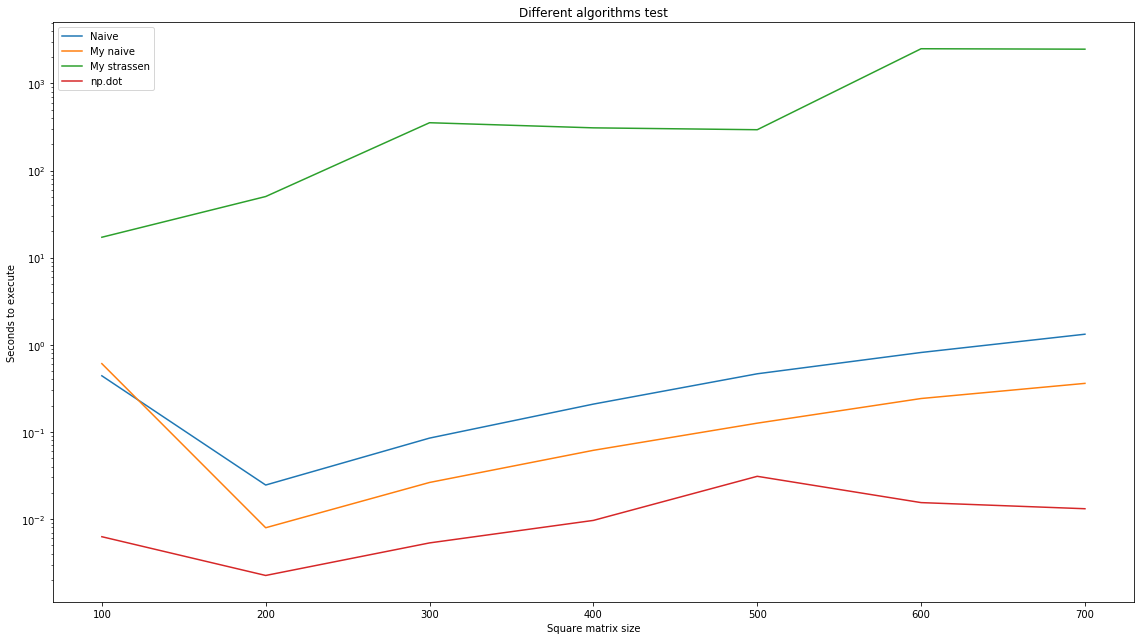

In [20]:
plt.figure(figsize=(16,9))
plt.plot(ns, naive_times)
plt.plot(ns, my_naive_times)
plt.plot(ns, strassen_times)
plt.plot(ns, dot_times)
plt.yscale("log")
plt.ylabel("Seconds to execute")
plt.xlabel("Square matrix size")
plt.title("Different algorithms test")

plt.legend(['Naive', 'My naive', 'My strassen', 'np.dot'])
plt.tight_layout()
plt.show()

So my strassen is well... hmm... not so good as I expected.

This happened because of the big constant in strassen algorithm and also because I couldn't use nopython option in numba (as some operations that I perform are not supported yet). Therefore we have a huge gap here. This can be improved if we'll cut strassen on early stages (for example when size of the matrix is less than 700) and use np.dot or naive multiplication.

# Problem 4 (SVD) 20 pts
In this assignment you are supposed to study how SVD could be used in image compression.
![](../files/1_4.png)

_1._ (2 pts) Compute the singular values of some predownloaded image (via the code provided below) and plot them. Do not forget to use logarithmic scale.

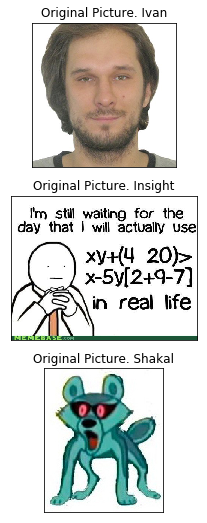

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import requests
import numpy as np


url = 'https://pbs.twimg.com/profile_images/1658625695/my_photo_400x400.jpg'  # Ivan
ivan_raw = Image.open(requests.get(url, stream=True).raw)
ivan = np.array(ivan_raw).astype(np.float64) / 255
url = 'https://i.chzbgr.com/full/5536320768/h88BAB406/' # Insight
insight_raw = Image.open(requests.get(url, stream=True).raw)
insight = np.array(insight_raw).astype(np.float64) / 255
url = 'https://cs8.pikabu.ru/images/previews_comm/2016-02_4/145590402713920711.jpg' # your favorite picture, please!

shakal_raw = Image.open(requests.get(url, stream=True).raw)
shakal = np.array(shakal_raw).astype(np.float64) / 255

plt.figure(figsize=(16,9))
plt.subplot(3,1,1)
plt.imshow(ivan_raw)
plt.xticks(())
plt.yticks(())
plt.title('Original Picture. Ivan')

plt.subplot(3,1,2)
plt.imshow(insight_raw)
plt.xticks(())
plt.yticks(())
plt.title('Original Picture. Insight')

plt.subplot(3,1,3)
plt.imshow(shakal_raw)
plt.xticks(())
plt.yticks(())
plt.title('Original Picture. Shakal')
plt.show()

In [3]:
M = shakal.shape[0]
N = shakal.shape[1]

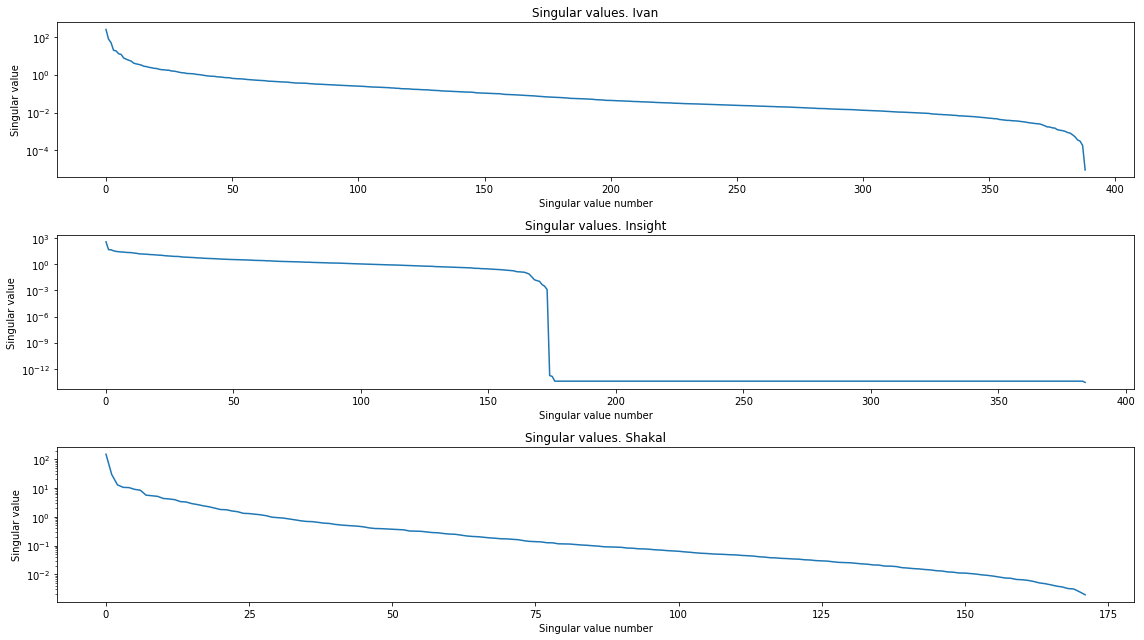

In [4]:
# Your code is here
# Let's plot for one channel
plt.figure(figsize=(16,9))


plt.subplot(3,1,1)
i_reshaped = ivan.reshape((3,ivan.shape[0],-1))
u,s,v = np.linalg.svd(i_reshaped[0])
plt.plot(s)
plt.ylabel("Singular value")
plt.xlabel("Singular value number")
plt.yscale("log")
plt.title('Singular values. Ivan')

plt.subplot(3,1,2)
i_reshaped = insight.reshape((3,insight.shape[0],-1))
u,s,v = np.linalg.svd(i_reshaped[0])
plt.plot(s)
plt.ylabel("Singular value")
plt.xlabel("Singular value number")
plt.yscale("log")
plt.title('Singular values. Insight')


plt.subplot(3,1,3)
i_reshaped = shakal.reshape((3,shakal.shape[0],-1))
u,s,v = np.linalg.svd(i_reshaped[0])
plt.plot(s)
plt.ylabel("Singular value")
plt.xlabel("Singular value number")
plt.yscale("log")
plt.title('Singular values. Shakal')

plt.tight_layout()
plt.show()

_2._ (3 pts) Complete a function ```compress```, that performs SVD and truncates it (using $k$ singular values/vectors). See the prototype below. 

Note, that in colourful case you have to split your image to channels and work with matrices corresponding to different channels separately.

Plot approximate reconstructed image $M_\varepsilon$ of your favorite image such that $rank(M_\varepsilon) = 5, 20, 50$ using ```plt.subplots```.

In [35]:
def compress(image, k):
    """
    Perform svd decomposition and truncate it (using k singular values/vectors)
    
    Parameters: 
        image (np.array):        input image (probably, colourful)
        
        k (int):                 approximation rank
        
    --------
    Returns:
      reconst_matrix (np.array): reconstructed matrix (tensor in colourful case)
      
      s (np.array):              array of singular values 
    """
#     Your code is here
    assert (image.shape[0] < image.shape[1]) and (image.shape[0] < image.shape[2]), "Reshape picture before passing it to this function"
    new_image = np.zeros(image.shape, dtype=np.float64)
    singular_values_for_each_channel = []
    for i in range(image.shape[0]):
        u,s,v = np.linalg.svd(image[i])
        u1 = u[:, :k]
        s1 = s[:k]
        v1 = v[:k, :]
        new_image[i] = u1.dot(np.diag(s1).dot(v1))
        singular_values_for_each_channel.append(s1)
    
    return new_image, singular_values_for_each_channel

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


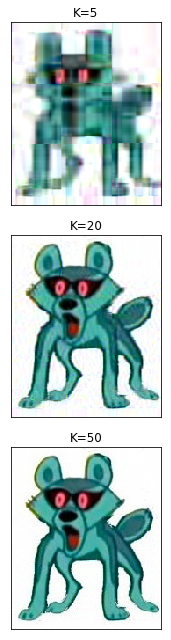

In [6]:
# Your code is here
plt.figure(figsize=(16,9))


plt.subplot(3,1,1)
plt.imshow(compress(i_reshaped, 5)[0].reshape((M,-1,3)))
plt.xticks(())
plt.yticks(())
plt.title('K=5')

plt.subplot(3,1,2)
plt.imshow(compress(i_reshaped, 20)[0].reshape((M,-1,3)))
plt.xticks(())
plt.yticks(())
plt.title('K=20')

plt.subplot(3,1,3)
plt.imshow(compress(i_reshaped, 50)[0].reshape((M,-1,3)))
plt.xticks(())
plt.yticks(())
plt.title('K=50')


plt.tight_layout()
plt.show()

_3._ (3 pts) Plot the following two figures for your favorite picture
* How relative error of approximation depends on the rank of approximation?
* How compression rate in terms of storing information ((singular vectors + singular numbers) / total size of image) depends on the rank of approximation?

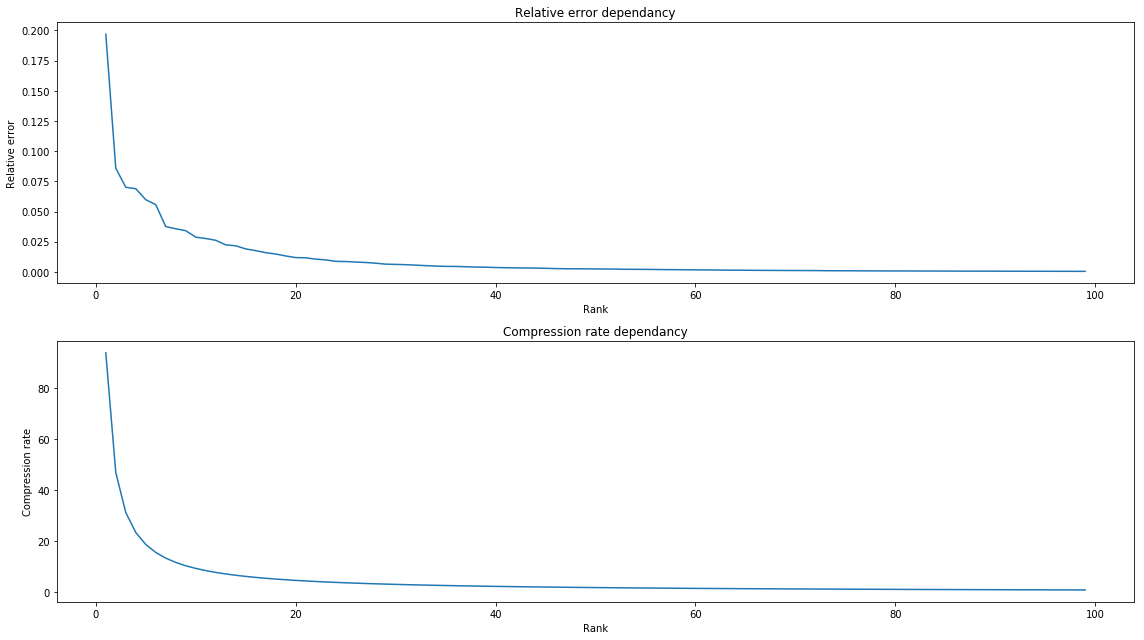

In [7]:
# Your code is here
plt.figure(figsize=(16,9))
# let's use zero channel
plt.subplot(2,1,1)
ranks = np.arange(1,100,1)
u,s,v = np.linalg.svd(i_reshaped[0])
relative_errors = []
for k in ranks:
    new, sing = compress(i_reshaped, k)
    relative_errors.append(np.linalg.norm(i_reshaped[0] - new[0], 2)/s[0])
    
    
plt.plot(ranks, relative_errors)
plt.xlabel("Rank")
plt.ylabel("Relative error")
plt.title('Relative error dependancy')

plt.subplot(2,1,2)
initial_size = i_reshaped[0].nbytes
compression_rates = []
for k in ranks:
    new_size = u[:, :k].nbytes + s[:k].nbytes + v[:k, :].nbytes
    compression_rates.append(initial_size/new_size)

plt.plot(ranks, compression_rates)
plt.xlabel("Rank")
plt.ylabel("Compression rate")
plt.title('Compression rate dependancy')

plt.tight_layout()
plt.show()

_4._ (2 pts) Consider the following two pictures. Compute their approximations (with the same rank, or relative error). What do you see? Explain results.

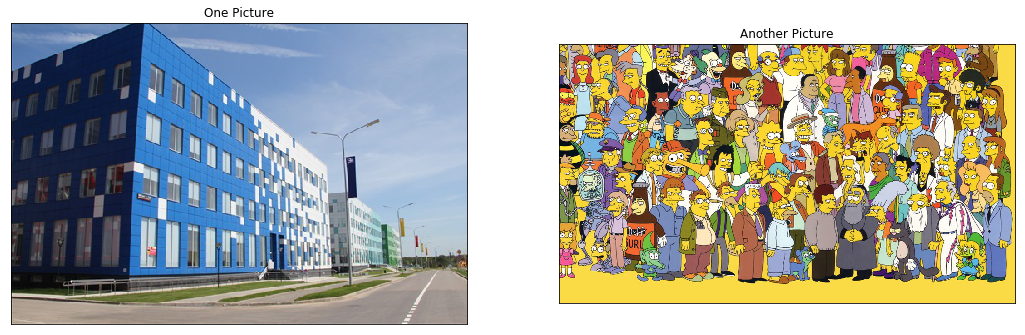

In [37]:
url1 = 'http://sk.ru/resized-image.ashx/__size/550x0/__key/communityserver-blogs-components-weblogfiles/00-00-00-60-11/skoltech1.jpg'
url2 = 'http://www.simpsoncrazy.com/content/characters/poster/bottom-right.jpg'
image_raw1 = Image.open(requests.get(url1, stream=True).raw)
image_raw2 = Image.open(requests.get(url2, stream=True).raw)

image1 = np.array(image_raw1).astype(np.float64) / 255
image2 = np.array(image_raw2).astype(np.float64) / 255

plt.figure(figsize=(18, 6))
plt.subplot(1,2,1)
plt.imshow(image_raw1)
plt.title('One Picture')
plt.xticks(())
plt.yticks(())

plt.subplot(1,2,2)
plt.imshow(image_raw2)
plt.title('Another Picture')
plt.xticks(())
plt.yticks(())

plt.show()

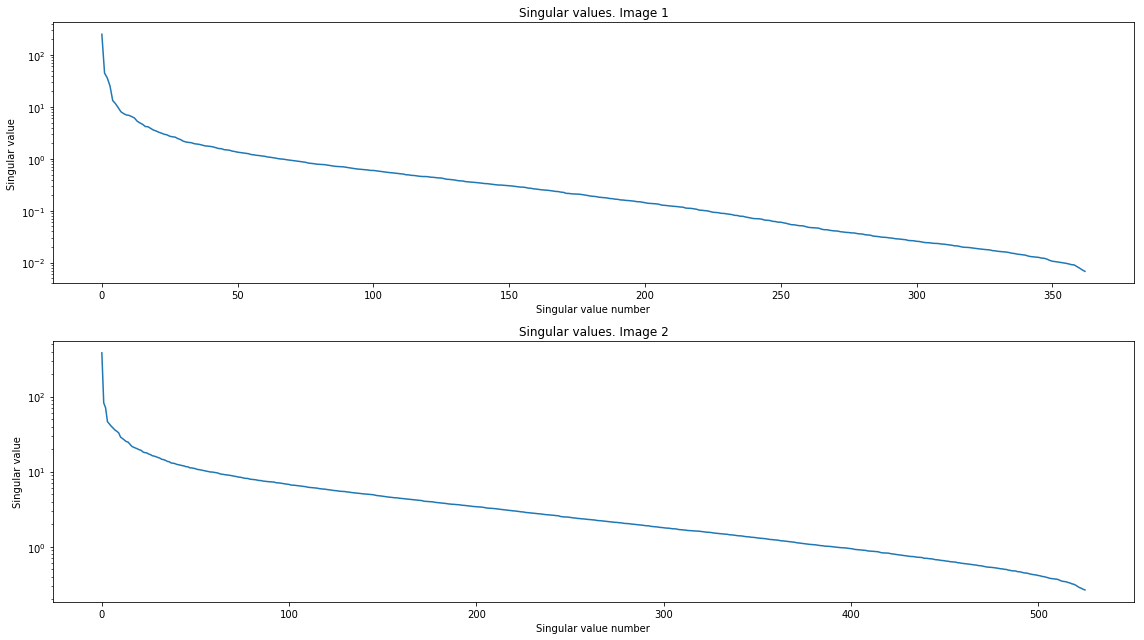

In [38]:
plt.figure(figsize=(16,9))


plt.subplot(2,1,1)
i_reshaped = image1.reshape((3,image1.shape[0],-1))
u,s,v = np.linalg.svd(i_reshaped[0])
plt.plot(s)
plt.ylabel("Singular value")
plt.xlabel("Singular value number")
plt.yscale("log")
plt.title('Singular values. Image 1')

plt.subplot(2,1,2)
i_reshaped = image2.reshape((3,image2.shape[0],-1))
u,s,v = np.linalg.svd(i_reshaped[0])
plt.plot(s)
plt.ylabel("Singular value")
plt.xlabel("Singular value number")
plt.yscale("log")
plt.title('Singular values. Image 2')

plt.tight_layout()
plt.show()

We can see that these pictures have different smallest size, so it's not correct to compress them by setting k at this moment. 

Let's make them the same size

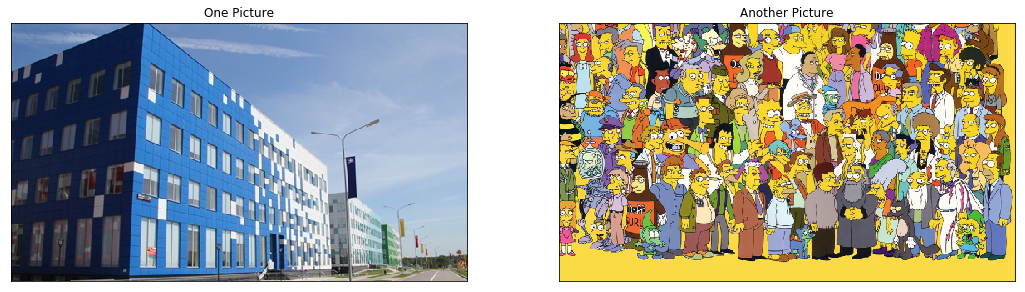

In [39]:
# let's make them to be the same size
hpercent = (image_raw1.size[0] / float(image_raw2.size[0]))
image_raw2 = image_raw2.resize((image_raw1.size[0], int(hpercent*(image_raw2.size[1]))))
image_raw1 = image_raw1.crop((0,0,image_raw1.size[0],image_raw2.size[1]))

image1 = np.array(image_raw1).astype(np.float64) / 255
image2 = np.array(image_raw2).astype(np.float64) / 255

plt.figure(figsize=(18, 6))
plt.subplot(1,2,1)
plt.imshow(image_raw1)
plt.title('One Picture')
plt.xticks(())
plt.yticks(())

plt.subplot(1,2,2)
plt.imshow(image_raw2)
plt.title('Another Picture')
plt.xticks(())
plt.yticks(())

plt.show()

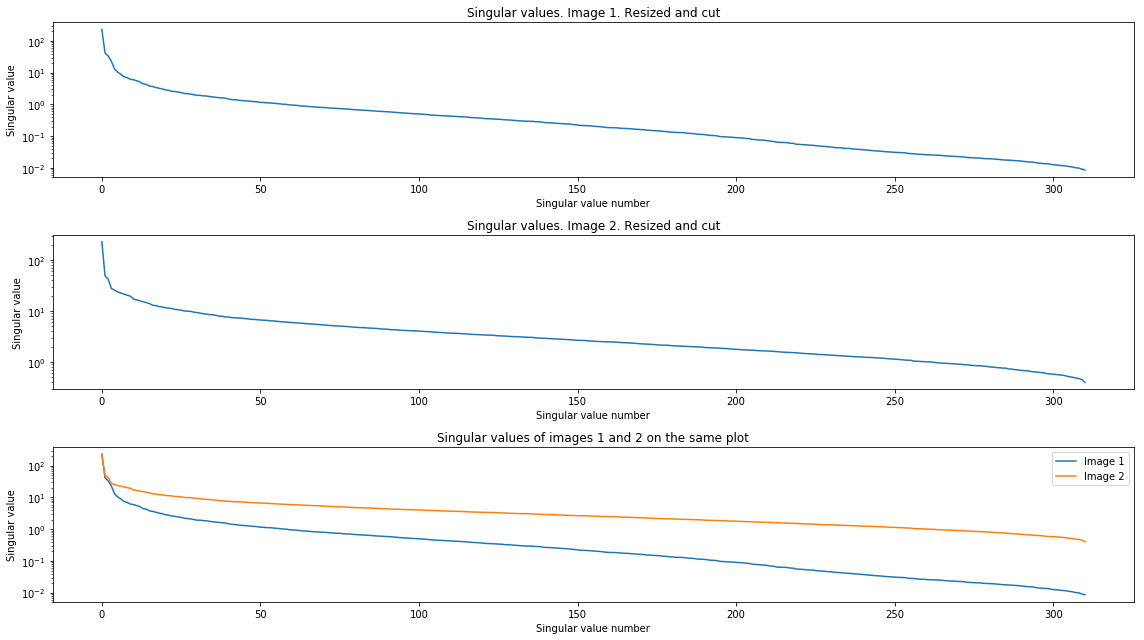

In [43]:
plt.figure(figsize=(16,9))


plt.subplot(3,1,1)
i_reshaped = image1.reshape((3,image1.shape[0],-1))
u1,s1,v1 = np.linalg.svd(i_reshaped[0])
plt.plot(s1)
plt.ylabel("Singular value")
plt.xlabel("Singular value number")
plt.yscale("log")
plt.title('Singular values. Image 1. Resized and cut')

plt.subplot(3,1,2)
i_reshaped = image2.reshape((3,image2.shape[0],-1))
u2,s2,v2 = np.linalg.svd(i_reshaped[0])
plt.plot(s2)
plt.ylabel("Singular value")
plt.xlabel("Singular value number")
plt.yscale("log")
plt.title('Singular values. Image 2. Resized and cut')

plt.subplot(3,1,3)
plt.plot(s1)
plt.plot(s2)
plt.ylabel("Singular value")
plt.xlabel("Singular value number")
plt.yscale("log")
plt.title('Singular values of images 1 and 2 on the same plot')
plt.legend(['Image 1', 
           'Image 2'])

plt.tight_layout()
plt.show()

Now we can use k

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


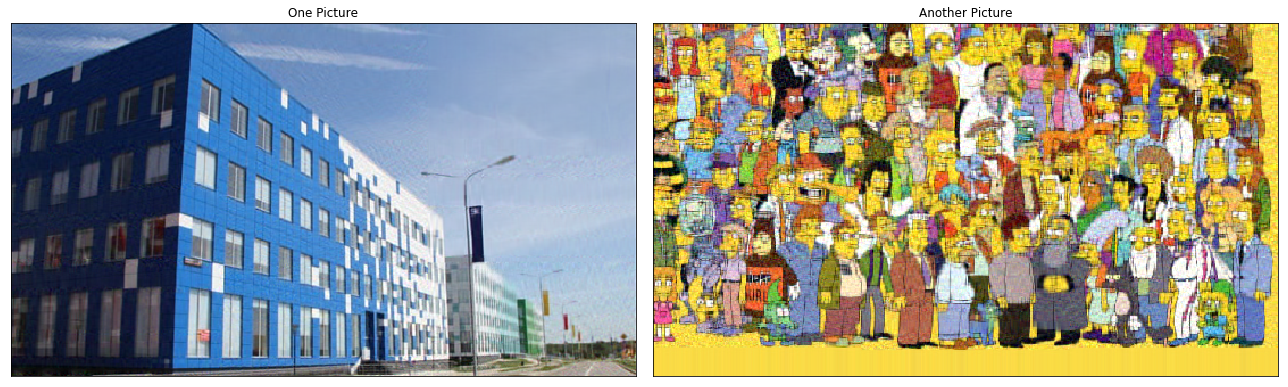

In [41]:
# Your code is here
k = 50

plt.figure(figsize=(18, 6))


new, sing = compress(image1.reshape((3,image1.shape[0],-1)), k)
plt.subplot(1,2,1)
plt.imshow(new.reshape((image1.shape[0],-1,3)))
plt.title('One Picture')
plt.xticks(())
plt.yticks(())


new, sing = compress(image2.reshape((3,image2.shape[0],-1)), k)
plt.subplot(1,2,2)
plt.imshow(new.reshape((image2.shape[0],-1,3)))
plt.title('Another Picture')
plt.xticks(())
plt.yticks(())

plt.tight_layout()
plt.show()

From these pictures and plots of singular values we can see that the first image is structurally simplier than the second one. Thus the singular values tail is not so heavy as it's for the second picture.

This is why the first picture in the last cell looks ok, everything is recognizable, but the second one lost a big part of the details, for example some faces, you can't recognize some of the people from "the Simpsons" now.

# Problem 5 (Bonus)

1. The norm is called absolute if $\|x\|=\| \lvert x \lvert \|$ holds for any vector $x$, where $x=(x_1,\dots,x_n)^T$ and $\lvert x \lvert = (\lvert x_1 \lvert,\dots, \lvert x_n \lvert)^T$. Give an example of a norm which is not absolute.

2. Write a function ```ranks_HOSVD(A, eps)```
that calculates Tucker ranks of a d-dimensional tensor $A$ using High-Order SVD (HOSVD) algorithm, where ```eps``` is the relative accuracy in the Frobenius norm between the approximated and the initial tensors. Details can be found [here](http://ca.sandia.gov/~tgkolda/pubs/pubfiles/TensorReview.pdf) on Figure 4.3.
```python
def ranks_HOSVD(A, eps):
      return r #r should be a tuple of ranks r = (r1, r2, ..., rd)
```